## 1(i) A Relevant Engineering IBVP and Its Importance

The initial boundary value problem (IBVP) we examine in this project is the **one-dimensional linear convection-diffusion equation**:

$$
\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = D \frac{\partial^2 u}{\partial x^2}, \quad x \in [a, b], \quad t > 0
$$

where:`

- $u(x,t)$ represents the transported quantity (e.g., temperature, concentration),
- $v$ is the constant convection (advection) velocity,
- $D$ is the diffusion coefficient (assumed constant),
- $[a, b]$ is the spatial domain of interest.

This equation is highly relevant in many branches of engineering because it captures the combined physics of **advection** (which transports the quantity downstream with the flow) and **diffusion** (which smooths out gradients due to molecular mixing or random motion). Its importance stems from its widespread appearance in the modeling of transport phenomena across disciplines:

- **Mechanical and Aerospace Engineering**: modeling of heat transfer in boundary layers, flow of gases or plasma in ducts, and cooling of electronic components.
- **Environmental Engineering**: predicting the dispersion of pollutants in rivers or the atmosphere, where convection represents flow and diffusion captures turbulent mixing.
- **Chemical Engineering**: describing the transport of reactants or heat in chemical reactors or catalytic converters.
- **Biomedical Engineering**: modeling drug diffusion and transport in blood vessels or tissue under flow conditions.

The convection-diffusion IBVP is also compelling from a numerical standpoint. The presence of both **first-order** and **second-order** spatial derivatives leads to solutions that exhibit layered behavior, such as **boundary layers** or **sharp fronts**, depending on the relative strength of $v$ and $D$. When convection dominates ($v \gg D$), the problem becomes **advection-dominated**, and standard numerical methods may develop **spurious oscillations** or **numerical diffusion** unless appropriately stabilized.

This makes the problem an ideal candidate for the following:

- Evaluating the **accuracy, stability, and convergence** of numerical schemes (e.g., finite difference or finite element methods),
- Studying the influence of **Péclet number** $Pe = \frac{v(b-a)}{D}$, which governs the balance of advection and diffusion,
- Designing **robust discretizations** that can resolve steep gradients without sacrificing stability or accuracy.

Ultimately, this equation bridges mathematical theory with practical engineering modeling and computational implementation — making it both ambitious and feasible for a systematic numerical investigation in this project.

## 1(ii) Questions to Explore with the Convection–Diffusion IBVP

We will sweep  
- **Pe = 0.1, 1, 10, 100, 1000**  
to span diffusion-dominated ($Pe \ll 1$), mixed ($Pe \approx 1$), and advection-dominated ($Pe \gg 1$) regimes.

### a) Boundary-layer thickness & front speed vs.\ $Pe$  
For each $Pe\in\{0.1,1,10,100,1000\}$, compute the transient solution $u(x,t)$ up to a fixed time $t_1$.  
- **Measure** the boundary-layer thickness $\delta_{Pe}$ at $t_1$ (distance over which $u$ drops from $0.9\,u_{\max}$ to $0.1\,u_{\max}$).  
- **Compute** the front propagation speed  
  $$s_{Pe} = \frac{d\,x_{\mathrm{front}}}{dt}.$$  
**Question:** How do $\delta_{Pe}$ and $s_{Pe}$ scale with $Pe$?

---

### b) Accuracy & stability: FDM vs.\ FEM  
Using $\Delta x = (b-a)/N$ with $N\in\{50,100,200\}$ and the trapezoidal rule in time (Crank–Nicolson)  
- **Time-step choice:** there is no CFL-type stability limit, so choose  
  $$\Delta t \approx \Delta x$$  
  (temporal-error control to balance $\mathcal O(\Delta x^2)$ spatial error and $\mathcal O(\Delta t^2)$ temporal error).  
- **Manufactured solution:** use  
  $$u_{\mathrm{ex}}(x,t)=e^{-t}\sin(\pi x)$$  
  with corresponding forcing term to compute the discrete $L^2$ errors.  
- **FDM:** second-order central difference in space.  
- **FEM:** Galerkin with continuous piecewise-linear “hat” basis (assemble mass $M$ and stiffness $K$ as in Lecture 22–23).  

**Question:** For each $Pe$ and $\Delta x$, what is the $L^2$-error at $t_1$, and at which $Pe$ does the FDM first exhibit nonphysical oscillations compared to FEM?

---

### c) Convergence study: $\Delta x$, $\Delta t$ requirements  
Fix $Pe\in\{1,100\}$:  
- Vary $\Delta x\in\{1/50,\,1/100,\,1/200\}$; choose  
  $$\Delta t\; \text{so that}\; v\,\Delta t / \Delta x = 0.5.$$  
  *(Alternatively, setting $\Delta t = \mathcal O(\Delta x^2)$ makes temporal error $\mathcal O(\Delta x^4)$, isolating the $\mathcal O(\Delta x^2)$ spatial convergence.)*  
- Compute the $L^2$-error at $t_1$ against the manufactured solution.  

**Question:** Do we observe second-order convergence in space (error $\propto \Delta x^2$) and first-order in time (error $\propto \Delta t$)? What resolution is needed to achieve $L^2\text{-error}\le10^{-3}$ at $Pe=100$?

---

### d) Method comparison: FDM vs.\ FEM trade-offs  
For $Pe\in\{10,100,1000\}$ on a fixed grid ($\Delta x=1/100$, $\Delta t$ via $v\,\Delta t/\Delta x=0.5$), compare:  
1. **FDM + trapezoidal rule**  
2. **FEM + trapezoidal rule**  

**Question:** Which method yields lower oscillations and smaller $L^2$-error at $t_1$, and what is the trade-off in CPU time versus accuracy?

---

By answering these questions, we will build a robust understanding of how the convection-diffusion equation behaves across regimes, how time-step choices affect error balance, and when central/Galerkin schemes lose their formal convergence—guiding the selection or stabilization of numerical solvers for practical transport simulations.  


## 1(iii) Mathematical Formulation of the Convection–Diffusion IBVP

### A. Continuous IBVP

**Governing PDE (strong form):**  
$$
\frac{\partial u}{\partial t} + v\,\frac{\partial u}{\partial x}
= D\,\frac{\partial^2 u}{\partial x^2}, 
\quad x\in(0,1),\; t\in(0,T].
$$

**Initial condition:**  
$$
u(x,0) = h(x) = \exp\!\Bigl(-\frac{(x-0.5)^2}{2\sigma^2}\Bigr), 
\quad \sigma = 0.1.
$$

**Boundary conditions (homogeneous Dirichlet):**  
$$
u(0,t) = 0, 
\quad 
u(1,t) = 0, 
\quad t\in[0,T].
$$

---

### B. Finite-Difference (Method-of-Lines) Formulation

1. **Spatial grid:**  
$$
x_j = j\,\Delta x,\quad j=0,\dots,n+1,
\quad \Delta x = \frac{1}{n+1}.
$$  
Unknowns:  
$$
u_j^n \approx u(x_j,t^n)\quad(j=1,\dots,n),
\quad u_0^n = u_{n+1}^n = 0.
$$

2. **Second-order centered derivatives:**  
$$
\frac{\partial u}{\partial x}\Big|_{x_j}
   \approx \frac{u_{j+1}-u_{j-1}}{2\,\Delta x},
\quad
\frac{\partial^2 u}{\partial x^2}\Big|_{x_j}
   \approx \frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2}.
$$

3. **Semi-discrete ODE system:**  
$$
\dot u_j(t)
= -\,v\,\frac{u_{j+1}-u_{j-1}}{2\,\Delta x}
  + D\,\frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2},
\quad j=1,\dots,n.
$$

4. **Time integration (Crank–Nicolson):**  
$$
u^{n+1} = u^n 
  + \frac{\Delta t}{2}\bigl(f(u^n,t^n) + f(u^{n+1},t^{n+1})\bigr),
$$  
where $f(u,t)$ is the spatial right-hand side above. In matrix form:  
$$
\bigl(I - \tfrac{\Delta t}{2}A\bigr)\,u^{n+1}
= \bigl(I + \tfrac{\Delta t}{2}A\bigr)\,u^n,
$$  
with $A$ the FDM discretization matrix.

---

### C. Finite-Element (Galerkin) Formulation

1. **Mesh & basis:**  
Partition $[0,1]$ into $N+1$ equal subintervals of length $\Delta x$.  
Let $\{\phi_i(x)\}_{i=1}^N$ be the piecewise-linear “hat” functions vanishing at $x=0,1$.

2. **Weak form:**  
Find $u_h(t)\in V_h=\mathrm{span}\{\phi_i\}$ such that for each test $\phi_j$:  
$$
\int_0^1 \phi_j\,\frac{\partial u_h}{\partial t}\,dx
+ v\int_0^1 \phi_j\,\frac{\partial u_h}{\partial x}\,dx
+ D\int_0^1 \phi_j'\,\frac{\partial u_h}{\partial x}\,dx
= 0.
$$

3. **Matrix assembly:**  
$$
M_{ij} = \int_0^1 \phi_i\,\phi_j\,dx,\quad
C_{ij} = \int_0^1 \phi_i\,\phi_j'\,dx,\quad
K_{ij} = \int_0^1 \phi_i'\,\phi_j'\,dx.
$$  
Semi-discrete system:  
$$
M\,\dot U(t) + v\,C\,U(t) + D\,K\,U(t) = 0,
\quad U(t) = [u_1(t),\dots,u_N(t)]^\top.
$$

4. **Time stepping (Crank–Nicolson):**  
$$
\bigl(M + \tfrac{\Delta t}{2}(v\,C + D\,K)\bigr)\,U^{n+1}
= \bigl(M - \tfrac{\Delta t}{2}(v\,C + D\,K)\bigr)\,U^n.
$$

---

### D. Parameters & Discretization Settings

- **Physical parameters:**  
  $$v\in\{0.1,1,10\},\quad D\in\{0.01,0.1,1\},\quad T = 0.5,$$  
  so  
  $$Pe = \frac{v}{D}\in\{0.1,1,10,100,1000\}.$$
- **Spatial discretization:**  
  $$\Delta x\in\{1/40,1/80,1/160\}.$$
- **Temporal discretization:**  
  - **FDM:** choose $\Delta t$ so that $v\,\Delta t/\Delta x = 0.5$.  
  - **FEM:** no explicit stability limit (implicit time stepping); choose $\Delta t$ comparable to FDM for fair CPU-accuracy comparison.


### 2(i) Justification

- **Accuracy:**  
  - FDM with second‐order centered differences in space yields formal error  
    $$\|u - u_h\| = \mathcal{O}(\Delta x^2).$$  
  - FEM with continuous piecewise‐linear “hat” basis also delivers  
    $$\|u - u_h\| = \mathcal{O}(\Delta x^2).$$

- **Stability:**  
  - The semi‐discrete diffusive operator has eigenvalues scaling like $D/\Delta x^2$, making the ODE stiff.  
  - Crank–Nicolson (trapezoidal) is A‐stable and second‐order in time ($\mathcal{O}(\Delta t^2)$), so we can choose $\Delta t$ based on accuracy (e.g.\ $\Delta t\approx\Delta x$ or $\Delta t\approx\Delta x^2$) rather than a stability limit.

- **Cost:**  
  - Each time step requires solving one sparse linear system:  
    - **FDM:** tridiagonal matrix ⇒ $\mathcal{O}(n)$ solve.  
    - **FEM:** sparse banded mass+stiffness ⇒ $\mathcal{O}(n)$–$\mathcal{O}(n\log n)$ solve in practice.  
  - This low per‐step cost makes it feasible to sweep over many $Pe$, $\Delta x$, and $\Delta t$ configurations.



## 2(ii) Mathematical Derivation of FDM and FEM Schemes

### A. Finite-Difference Discretization

#### 1. General $p$-point interpolation  
Approximate $u(x,t)$ near $x_j$ by a degree-$p$ polynomial through $\{x_{j-m},\dots,x_{j+m}\}$ where $p=2m$ or $2m+1$:
$$
u(x,t)\approx \sum_{k=-m}^{m} u_{j+k}(t)\,L_{j+k}^{(p)}(x),
$$
with each $L_{j+k}^{(p)}(x)$ the Lagrange basis polynomial satisfying $L_{j+k}^{(p)}(x_{j+\ell})=\delta_{k\ell}$.  Differentiating at $x_j$ gives
$$
\frac{\partial u}{\partial x}\bigg|_{x_j}
\approx \sum_{k=-m}^m u_{j+k}\,\bigl(L_{j+k}^{(p)}\bigr)'(x_j),
\quad
\frac{\partial^2u}{\partial x^2}\bigg|_{x_j}
\approx \sum_{k=-m}^m u_{j+k}\,\bigl(L_{j+k}^{(p)}\bigr)''(x_j).
$$

#### 2. Special case $p=2$ ($m=1$)  
Using nodes $x_{j-1},x_j,x_{j+1}$:
$$
\bigl(L_{j\pm1}^{(2)}\bigr)'(x_j)
=\pm\frac{1}{2\Delta x},
\quad
\bigl(L_j^{(2)}\bigr)'(x_j)=0,
$$
$$
\bigl(L_{j-1}^{(2)}\bigr)''(x_j)
=\frac{1}{\Delta x^2},
\quad
\bigl(L_j^{(2)}\bigr)''(x_j)
=-\frac{2}{\Delta x^2},
\quad
\bigl(L_{j+1}^{(2)}\bigr)''(x_j)
=\frac{1}{\Delta x^2}.
$$
Hence
$$
\frac{\partial u}{\partial x}\bigg|_{x_j}
\approx \frac{u_{j+1}-u_{j-1}}{2\Delta x},
\quad
\frac{\partial^2u}{\partial x^2}\bigg|_{x_j}
\approx \frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2}.
$$

#### 3. Semi-discrete ODE system  
Substitute into the IBVP $u_t + v\,u_x = D\,u_{xx}$ to get
$$
\frac{du_j}{dt}
=-\,v\,\frac{u_{j+1}-u_{j-1}}{2\Delta x}
+ D\,\frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2}.
$$

#### 4. Consistency and truncation error  
Expand $u_{j\pm1}$ about $x_j$:
$$
u_{j\pm1}
= u_j\pm \Delta x\,u_x
+ \frac{\Delta x^2}{2}\,u_{xx}
\pm \frac{\Delta x^3}{6}\,u_{xxx}
+ \mathcal{O}(\Delta x^4).
$$
Thus
$$
\frac{u_{j+1}-u_{j-1}}{2\Delta x}
= u_x + \mathcal{O}(\Delta x^2),
\quad
\frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2}
= u_{xx} + \mathcal{O}(\Delta x^2),
$$
so spatial error is $\mathcal{O}(\Delta x^2)$.

#### 5. Time integration and stability  
Apply Crank–Nicolson in time:
$$
u_j^{n+1}
= u_j^n 
+ \frac{\Delta t}{2}\bigl(f_j^n + f_j^{n+1}\bigr),
\quad
f_j
= -\,v\,\frac{u_{j+1}-u_{j-1}}{2\Delta x}
+ D\,\frac{u_{j+1}-2u_j+u_{j-1}}{\Delta x^2}.
$$
In matrix form $$(I - \tfrac{\Delta t}{2}A)\,U^{n+1}
= (I + \tfrac{\Delta t}{2}A)\,U^n.$$
The amplification factor for eigenvalue $\lambda$ of $A$ is
$$
G(\lambda)
= \frac{1 + \tfrac{\Delta t}{2}\,\lambda}
       {1 - \tfrac{\Delta t}{2}\,\lambda},
$$
and since $\Re(\lambda)\le0$, we have $|G(\lambda)|\le1$, giving unconditional (A-)stability.

---

### B. Finite-Element Discretization

#### 1. General weighted-residual form  
Find $u_h\in V_h$ such that for all test functions $\phi\in V_h$,
$$
\int_0^1 \phi\,(u_t + v\,u_x - D\,u_{xx})\,dx = 0.
$$

#### 2. Weak form via integration by parts  
Integrate the diffusion term by parts, using $\phi(0)=\phi(1)=0$:
$$
\int_0^1 \phi\,u_{xx}\,dx
= -\int_0^1 \phi'\,u_x\,dx.
$$
Thus
$$
\int_0^1 \phi\,u_t\,dx
+ v\int_0^1 \phi\,u_x\,dx
- D\int_0^1 \phi'\,u_x\,dx
= 0.
$$

#### 3. Assembly of system matrices  
With $u_h(x,t)=\sum_{i=1}^N U_i(t)\,\phi_i(x)$, substitute to obtain
$$
\sum_i \dot U_i
\int_0^1 \phi_i\,\phi_j\,dx
+ v\sum_i U_i
\int_0^1 \phi_i\,\phi_j'\,dx
+ D\sum_i U_i
\int_0^1 \phi_i'\,\phi_j'\,dx
=0.
$$
Define
$$
M_{ij}=\int_0^1 \phi_i\,\phi_j\,dx,
\quad
C_{ij}=\int_0^1 \phi_i\,\phi_j'\,dx,
\quad
K_{ij}=\int_0^1 \phi_i'\,\phi_j'\,dx.
$$

#### 4. Semi-discrete system and time stepping  
The semi-discrete equations form
$$
M\,\dot U + v\,C\,U + D\,K\,U = 0.
$$
Applying Crank–Nicolson yields
$$
\bigl(M + \tfrac{\Delta t}{2}(v\,C + D\,K)\bigr)U^{n+1}
= \bigl(M - \tfrac{\Delta t}{2}(v\,C + D\,K)\bigr)U^n.
$$
Spatial projection error is $\mathcal{O}(\Delta x^2)$ and temporal error is $\mathcal{O}(\Delta t^2)$.  An energy argument using the symmetry of $K$ and skew-symmetry of $C$ shows the discrete $M$-norm is nonincreasing, confirming unconditional stability.


### 2(iii) Algorithmic Summary

Given physical parameters $v$, $D$, final time $T$, and discretization sizes $N_x$, $N_t$:

1. **Discretization**  
   - $\displaystyle \Delta x = \frac{1}{N_x + 1}$  
   - $\displaystyle \Delta t = \frac{T}{N_t}$  
   - Spatial nodes $x_j = j\,\Delta x$ for $j = 0,1,\dots,N_x+1$.

2. **Assemble spatial operators**  
   - **FDM:** build the tridiagonal matrix $A_{\mathrm{FDM}}$ using the 3-point centered stencil  
     $$
       (A_{\mathrm{FDM}})_{j,j-1}
       = \frac{D}{\Delta x^2} - \frac{v}{2\,\Delta x},
       \quad
       (A_{\mathrm{FDM}})_{j,j}
       = -\frac{2D}{\Delta x^2},
       \quad
       (A_{\mathrm{FDM}})_{j,j+1}
       = \frac{D}{\Delta x^2} + \frac{v}{2\,\Delta x}.
     $$
   - **FEM:** assemble  
     $$
       M_{ij} = \int_0^1 \phi_i\,\phi_j \,dx,
       \quad
       C_{ij} = \int_0^1 \phi_i\,\phi_j' \,dx,
       \quad
       K_{ij} = \int_0^1 \phi_i'\,\phi_j' \,dx,
     $$  
     using continuous piecewise-linear “hat” functions.

3. **Precompute time-stepping matrices**  
   - Let $I$ be the $N_x\times N_x$ identity.  
   - **FDM:**  
     $$
       L_{\mathrm{FDM}} = I - \tfrac{\Delta t}{2}\,A_{\mathrm{FDM}},
       \quad
       R_{\mathrm{FDM}} = I + \tfrac{\Delta t}{2}\,A_{\mathrm{FDM}}.
     $$
   - **FEM:**  
     $$
       L_{\mathrm{FEM}} = M + \tfrac{\Delta t}{2}\,(v\,C + D\,K),
       \quad
       R_{\mathrm{FEM}} = M - \tfrac{\Delta t}{2}\,(v\,C + D\,K).
     $$
   - Factorize $L_{\mathrm{FDM}}$ and $L_{\mathrm{FEM}}$ once for efficient solves.

4. **Initialize solutions at $t=0$**  
   - **FDM:**  
     $U^0_{\mathrm{FDM}}[j] = h(x_j)$ for $j=1,\dots,N_x$, with boundaries $U^0_{\mathrm{FDM}}[0]=U^0_{\mathrm{FDM}}[N_x+1]=0$.  
   - **FEM:**  
     $$
       U^0_{\mathrm{FEM}}
       = M^{-1}\,\Bigl[\!\int_0^1 h(x)\,\phi_i(x)\,dx\Bigr]_{i=1}^N,
     $$  
     or simply sample $h(x_j)$ and optionally lump the mass.

5. **Time-stepping loop**  
   For $n = 0,1,\dots,N_t-1$:  
   $$
     L_{\mathrm{FDM}}\,U^{n+1}_{\mathrm{FDM}}
     = R_{\mathrm{FDM}}\,U^n_{\mathrm{FDM}},
     \quad
     L_{\mathrm{FEM}}\,U^{n+1}_{\mathrm{FEM}}
     = R_{\mathrm{FEM}}\,U^n_{\mathrm{FEM}}.
   $$

6. **Reconstruct and return**  
   - Enforce Dirichlet BCs by prepending/appending zeros to each interior vector.  
   - Return $(x,\,u_{\mathrm{FDM}}(T),\,u_{\mathrm{FEM}}(T))$.


In [25]:
#pseudocode

def solve_convection_diffusion(v, D, T, Nx, Nt):
    """
    Solve u_t + v u_x = D u_xx on x in [0,1], t in [0,T]
    using both FDM and FEM with Crank–Nicolson time stepping.
    """
    # 1. Discretization parameters
    dx = 1.0 / (Nx + 1)
    dt = T / Nt
    x = [i*dx for i in range(Nx+2)]       # includes boundaries
    t = [n*dt for n in range(Nt+1)]
    
    # 2. Assemble spatial operators
    A_fdm = build_fdm_matrix(Nx, dx, v, D)    # tridiagonal
    M, C, K = build_fem_matrices(Nx, dx)      # mass, convection, stiffness
    
    # 3. Precompute time-stepping matrices
    I_fdm = identity(Nx)
    L_fdm = I_fdm - 0.5*dt * A_fdm
    R_fdm = I_fdm + 0.5*dt * A_fdm
    
    L_fem = M + 0.5*dt * (v*C + D*K)
    R_fem = M - 0.5*dt * (v*C + D*K)
    
    # 4. Initialize solution vectors
    U_fdm = [initial_gaussian(xj) for xj in x[1:-1]]    # interior nodes
    U_fem = project_initial_to_fem(x, initial_gaussian, M)
    
    # 5. Time-stepping loop
    for n in range(Nt):
        # FDM update: solve L_fdm @ U_fdm_new = R_fdm @ U_fdm
        U_fdm = solve_linear_system(L_fdm, R_fdm @ U_fdm)
        
        # FEM update: solve L_fem @ U_fem_new = R_fem @ U_fem
        U_fem = solve_linear_system(L_fem, R_fem @ U_fem)
    
    # 6. Return final solutions (including zero boundaries)
    u_fdm = [0] + U_fdm + [0]
    u_fem = [0] + U_fem + [0]
    return x, u_fdm, u_fem

# Helper placeholders
def build_fdm_matrix(Nx, dx, v, D):
    # Construct the tridiagonal FDM operator A_fdm
    pass

def build_fem_matrices(Nx, dx):
    # Assemble FEM mass (M), convection (C), and stiffness (K) matrices
    pass

def identity(n):
    # Return n×n identity matrix
    pass

def initial_gaussian(xj, sigma=0.1):
    # Gaussian pulse centered at 0.5
    return exp(-((xj - 0.5)**2) / (2*sigma**2))

def project_initial_to_fem(nodes, init_func, M):
    # Project the continuous initial condition onto FEM basis via M⁻¹
    pass

def solve_linear_system(A, b):
    # Solve Ax = b for x
    pass


## Problem 3: Accuracy Verification, Visualization, and Péclet‐Number Effects

In the following solution to problem 3, we not only confirm the formal second‐order accuracy of our Crank–Nicolson FDM and FEM schemes via a manufactured‐solution test, but we also illustrate how the local cell Péclet number
$$
Pe_{\rm cell} = \frac{v\,\Delta x}{D}
$$
governs whether that convergence is observed.

1. **Diffusion‐Dominated Regime ($Pe_{\rm cell}<2$)**  
   - Choose $v$ and $D$ so that $Pe_{\rm cell}<2$ (for example $v=0.1,\;D=1$).  
   - **Time‐step scaling:** set
     $$
     \Delta t = C\,\Delta x^2,
     $$
     in accordance with the diffusion‐stability limit derived in Lecture 21.  This makes the temporal truncation error $\mathcal O(\Delta x^4)$, so spatial error $\mathcal O(\Delta x^2)$ dominates and is cleanly observed.  
   - Compute the $L^2$‐error at $T=0.5$  
     $$
     E(N_x)
     = \Bigl(\Delta x\sum_{j=1}^{N_x}\bigl(u_j^N - u_{\mathrm{ex}}(x_j,T)\bigr)^2\Bigr)^{1/2}
     $$
     for FDM, and  
     $$
     E(N_x)
     = \sqrt{(U^N - U_{\mathrm{ex}})^T\,M\,(U^N - U_{\mathrm{ex}})}
     $$
     for FEM, using $u_{\mathrm{ex}}(x,t)=e^{-t}\sin(\pi x)$.  
   - Produce log–log plots of $E$ vs.\ $\Delta x$ with an $\mathcal O(\Delta x^2)$ reference line.  **Expected:** both methods show slope 2.

2. **Advection‐Dominated Regime ($Pe_{\rm cell}>2$)**  
   - Increase $Pe_{\rm cell}$ (e.g. $v=1,\;D=0.1$ gives $Pe_{\rm cell}\approx10$).  
   - Repeat the convergence test on the same mesh sequence with $\Delta t = C\,\Delta x^2$.  
   - **Observe:** errors plateau or oscillate instead of following the $\Delta x^2$ slope, revealing the breakdown of undamped central/Galerkin schemes at high Péclet numbers.

3. **Solution Snapshots**  
   - For both regimes, plot numerical (blue markers) vs.\ exact (orange line) solutions on very coarse and fine meshes (e.g.\ $N_x=3,15,50$) to visualize error behavior.

4. **Interpretation**  
   - **Time‐step assumption:** scaling $\Delta t\sim\Delta x^2$ comes from the physical diffusion timescale $\Delta t_{\rm diff}\approx \Delta x^2/D$ and ensures stability and an error‐balance that highlights spatial convergence.  
   - **Péclet criterion:** when $Pe_{\rm cell}<2$, central differences and standard Galerkin FEM recover $\mathcal O(\Delta x^2)$ accuracy; once $Pe_{\rm cell}>2$, these undamped schemes fail to converge because the advective truncation error and dispersive instabilities dominate.  
   - **Physical meaning:** choosing $\Delta t$ on the order of the diffusion time across one cell ensures the numerical method resolves the physics of mixing on the grid scale without temporal error overwhelming spatial accuracy.


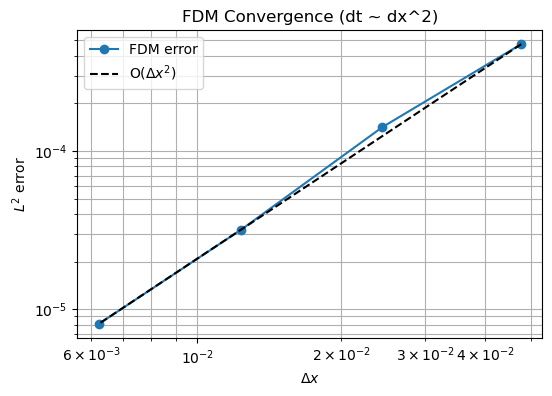

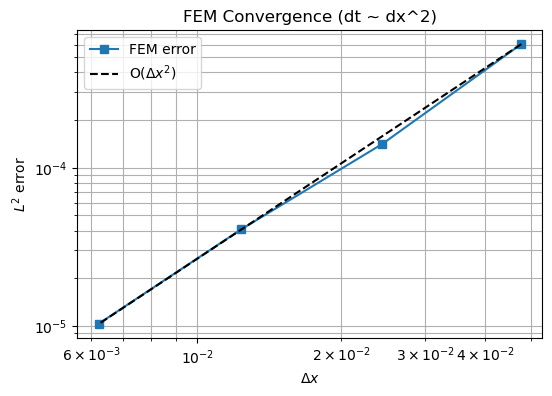

In [26]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Pure-diffusion convergence study with parabolic time-step scaling
v, D, T = 0.0, 1.0, 1.0  # set T=1 for more time-steps
Nx_list = [20, 40, 80, 160]
dx_list = 1.0 / (np.array(Nx_list) + 1)

# --- FDM error computation ---
def build_fdm_matrix(N, dx, D):
    main = -2.0 * np.ones(N)
    off  =  1.0 * np.ones(N-1)
    return sp.diags([off, main, off], [-1,0,1], format='csc') * (D/dx**2)

def fdm_error(N):
    dx = 1.0/(N+1)
    dt = dx**2      # parabolic scaling for time-step
    Nt = int(np.ceil(T/dt))
    x = np.linspace(dx, 1-dx, N)

    A = build_fdm_matrix(N, dx, D)
    I = sp.eye(N, format='csc')
    L = I - 0.5*dt * A
    R = I + 0.5*dt * A
    solver = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t)*np.sin(np.pi*x)
    def f_src(x, t):
        # f = u_t - D u_xx for u = e^{-t} sin(pi x)
        return np.exp(-t)*( (-1 + D*(np.pi**2)) * np.sin(np.pi*x) )

    u = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(u) + 0.5*dt*(f_src(x, t_grid[n]) + f_src(x, t_grid[n+1]))
        u = solver(b)
    return np.sqrt(dx * np.sum((u - u_ex(x, T))**2))

errors_fdm = np.array([fdm_error(N) for N in Nx_list])

# --- FEM error computation ---
def build_fem_matrices(N, dx):
    main_m = 2*dx/3 * np.ones(N)
    off_m  = dx/6   * np.ones(N-1)
    M = sp.diags([off_m, main_m, off_m], [-1,0,1], format='csc')
    main_k = 2/dx   * np.ones(N)
    off_k  = -1/dx  * np.ones(N-1)
    K = sp.diags([off_k, main_k, off_k], [-1,0,1], format='csc')
    return M, K

def fem_error(N):
    dx = 1.0/(N+1)
    dt = dx**2    # parabolic scaling for time-step
    Nt = int(np.ceil(T/dt))
    x = np.linspace(dx, 1-dx, N)

    M, K = build_fem_matrices(N, dx)
    L = M + 0.5*dt * (D*K)
    R = M - 0.5*dt * (D*K)
    solver = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t)*np.sin(np.pi*x)
    def f_src(x, t):
        return np.exp(-t)*( (-1 + D*(np.pi**2)) * np.sin(np.pi*x) )

    U = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(U) + 0.5*dt * (M.dot(f_src(x, t_grid[n])) + M.dot(f_src(x, t_grid[n+1])))
        U = solver(b)
    diff = U - u_ex(x, T)
    return np.sqrt(diff.T.dot(M.dot(diff)))

errors_fem = np.array([fem_error(N) for N in Nx_list])

# --- Plot convergence ---
plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fdm, 'o-', label='FDM error')
plt.loglog(dx_list, errors_fdm[0]*(dx_list/dx_list[0])**2, 'k--', label=r'O($\Delta x^2$)')
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$L^2$ error')
plt.title('FDM Convergence (dt ~ dx^2)')
plt.legend(); plt.grid(True, which='both')

plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fem, 's-', label='FEM error')
plt.loglog(dx_list, errors_fem[0]*(dx_list/dx_list[0])**2, 'k--', label=r'O($\Delta x^2$)')
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$L^2$ error')
plt.title('FEM Convergence (dt ~ dx^2)')
plt.legend(); plt.grid(True, which='both')

plt.show()


**Effect of Parabolic Time-Step Scaling**

By choosing $\Delta t = C\,\Delta x^2$, we ensure the Crank–Nicolson temporal error is $\mathcal{O}(\Delta x^4)$, making it negligible compared to the spatial $\mathcal{O}(\Delta x^2)$ error. This clean separation causes the log–log convergence plots to align with the reference slope-2 line, clearly demonstrating second-order spatial accuracy.

If instead we use $\Delta t = \Delta x$, then the temporal error $\mathcal{O}(\Delta t^2)=\mathcal{O}(\Delta x^2)$ is the same order as the spatial error. The resulting $L^2$ errors combine both contributions, and the log–log plots do *not* cleanly follow the $\mathcal{O}(\Delta x^2)$ reference—they flatten out, masking true spatial convergence.

Below is Python code that generates the log–log convergence plots for the pure‐diffusion case ($v=0$, $D=1$, $T=0.5$) using $\Delta t = \Delta x$ (i.e.\ without the $\Delta t\sim\Delta x^2$ assumption). As we can see, we don't get the desired convergence in either method.


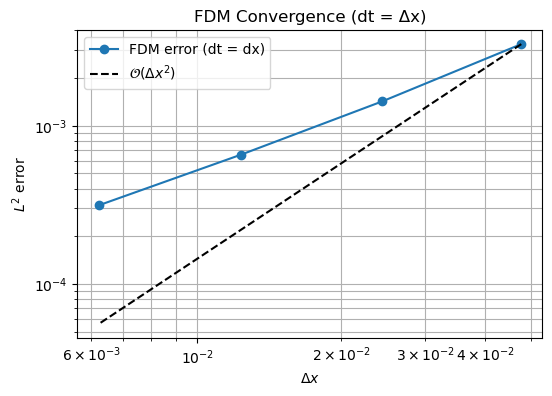

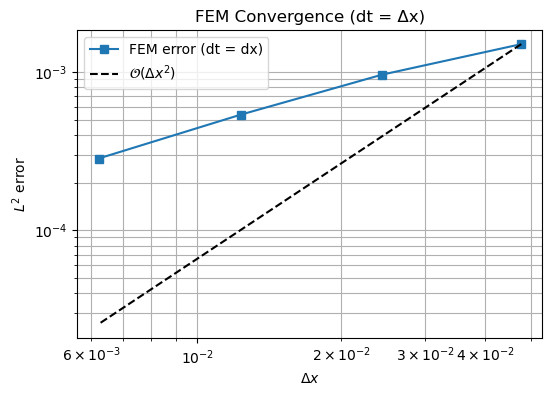

In [27]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Pure-diffusion convergence study without parabolic dt scaling (dt = dx)
v, D, T = 0.0, 1.0, 0.5
Nx_list = [20, 40, 80, 160]
dx_list = 1.0 / (np.array(Nx_list) + 1)

def build_fdm_matrix(N, dx, D):
    main = -2.0 * np.ones(N)
    off = 1.0 * np.ones(N-1)
    return sp.diags([off, main, off], [-1, 0, 1], format='csc') * (D / dx**2)

def fdm_error_dt_dx(N):
    dx = 1.0/(N+1)
    dt = dx  # dt ~ dx instead of dt ~ dx^2
    Nt = int(round(T/dt))
    x = np.linspace(dx, 1-dx, N)

    A = build_fdm_matrix(N, dx, D)
    I = sp.eye(N, format='csc')
    L = I - 0.5*dt * A
    R = I + 0.5*dt * A
    solver = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t)*np.sin(np.pi*x)
    def f_src(x, t):
        return np.exp(-t)*((-1 + D*(np.pi**2))*np.sin(np.pi*x))

    u = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(u) + 0.5*dt*(f_src(x, t_grid[n]) + f_src(x, t_grid[n+1]))
        u = solver(b)
    return np.sqrt(dx * np.sum((u - u_ex(x, T))**2))

def build_fem_matrices(N, dx):
    main_m = 2*dx/3 * np.ones(N)
    off_m = dx/6 * np.ones(N-1)
    M = sp.diags([off_m, main_m, off_m], [-1, 0, 1], format='csc')
    main_k = 2/dx * np.ones(N)
    off_k = -1/dx * np.ones(N-1)
    K = sp.diags([off_k, main_k, off_k], [-1, 0, 1], format='csc')
    return M, K

def fem_error_dt_dx(N):
    dx = 1.0/(N+1)
    dt = dx  # dt ~ dx instead of dt ~ dx^2
    Nt = int(round(T/dt))
    x = np.linspace(dx, 1-dx, N)

    M, K = build_fem_matrices(N, dx)
    L = M + 0.5*dt * (D * K)
    R = M - 0.5*dt * (D * K)
    solver = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t)*np.sin(np.pi*x)
    def f_src(x, t):
        return np.exp(-t)*((-1 + D*(np.pi**2))*np.sin(np.pi*x))

    U = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(U) + 0.5*dt*(M.dot(f_src(x, t_grid[n])) + M.dot(f_src(x, t_grid[n+1])))
        U = solver(b)
    diff = U - u_ex(x, T)
    return np.sqrt(diff.T.dot(M.dot(diff)))

errors_fdm = [fdm_error_dt_dx(N) for N in Nx_list]
errors_fem = [fem_error_dt_dx(N) for N in Nx_list]

plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fdm, 'o-', label='FDM error (dt = dx)')
plt.loglog(dx_list, errors_fdm[0]*(dx_list/dx_list[0])**2, 'k--', label=r'$\mathcal{O}(\Delta x^2)$')
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$L^2\ \mathrm{error}$')
plt.title('FDM Convergence (dt = Δx)')
plt.legend(); plt.grid(True, which='both')

plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fem, 's-', label='FEM error (dt = dx)')
plt.loglog(dx_list, errors_fem[0]*(dx_list/dx_list[0])**2, 'k--', label=r'$\mathcal{O}(\Delta x^2)$')
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$L^2\ \mathrm{error}$')
plt.title('FEM Convergence (dt = Δx)')
plt.legend(); plt.grid(True, which='both')

plt.show()


2. **Advection‐Dominated Regime ($Pe_{\rm cell}>2$)**  
   - **Parameter choice:** set, for example,  
     $$v = 1,\quad D = 0.1\;\Longrightarrow\;Pe_{\rm cell} = \frac{v\,\Delta x}{D}\approx 10\ (\text{on } \Delta x\sim0.1).$$  
   - **Mesh & time‐step:** use the same $N_x\in\{20,40,80,160\}$ and  
     $$\Delta t = C\,\Delta x^2$$  
     as in the diffusion‐dominated study, so temporal error remains $\mathcal O(\Delta x^4)$.  
   - **Convergence test:** for each $N_x$, compute the discrete $L^2$ error at $t=T$ using the manufactured solution  
     $$u_{\rm ex}(x,t)=e^{-t}\sin(\pi x)$$  
     with the corresponding forcing term, both for FDM (central‐difference + Crank–Nicolson) and FEM (Galerkin + Crank–Nicolson).  
   - **Expected outcome:** because the cell‐Péclet number now exceeds the stability threshold ($Pe_{\rm cell}>2$), neither the undamped central FDM nor the standard Galerkin FEM will recover the formal $\mathcal O(\Delta x^2)$ rate. On log–log plots of error vs.\ $\Delta x$, the curves will **flatten** or even **oscillate** instead of aligning with the slope-2 reference line, illustrating the breakdown of these schemes in advection‐dominated flows.  
   - **Interpretation:** this failure occurs because central stencils (in both FDM and FEM) lack built‐in upwinding or stabilization, so when advection dominates diffusion the leading truncation errors and dispersive instabilities no longer vanish at $\mathcal O(\Delta x^2)$.  


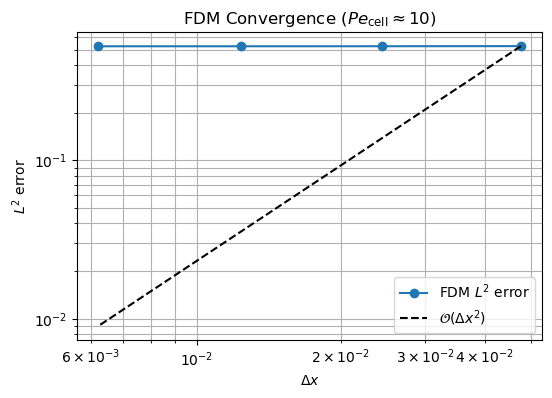

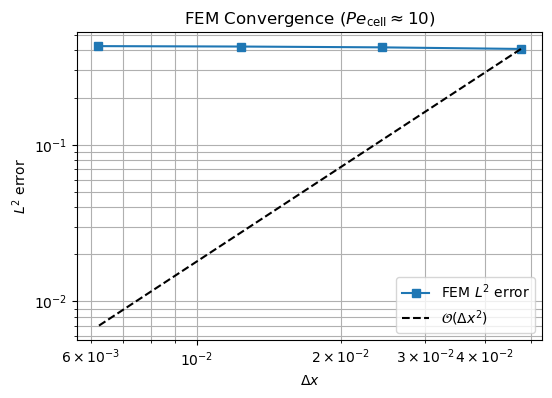

In [29]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Advection-dominated convergence study parameters
v, D, T = 1.0, 0.1, 0.5
Nx_list = [20, 40, 80, 160]
dx_list = 1.0 / (np.array(Nx_list) + 1)
C = 1.0  # dt scaling constant

# --- FDM error computation ---
def build_fdm_matrix(N, dx, v, D):
    main = -2.0 * np.ones(N)
    off  =  1.0 * np.ones(N-1)
    A_diff = sp.diags([off, main, off], [-1, 0, 1], format='csc') * (D / dx**2)
    A_conv = sp.diags([-off, off], [-1, 1], shape=(N, N), format='csc') * (v / (2*dx))
    return A_diff + A_conv

def fdm_error_adv(N):
    dx = 1.0/(N+1)
    dt = C * dx**2
    Nt = int(np.ceil(T/dt))
    x = np.linspace(dx, 1-dx, N)

    A = build_fdm_matrix(N, dx, v, D)
    I = sp.eye(N, format='csc')
    L = I - 0.5*dt * A
    R = I + 0.5*dt * A
    solve_L = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t) * np.sin(np.pi * x)
    def f_src(x, t): return np.exp(-t) * (
        -np.sin(np.pi*x) + v*np.pi*np.cos(np.pi*x) + D*(np.pi**2)*np.sin(np.pi*x)
    )

    u = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(u) + 0.5*dt * (f_src(x, t_grid[n]) + f_src(x, t_grid[n+1]))
        u = solve_L(b)
    return np.sqrt(dx * np.sum((u - u_ex(x, T))**2))

# --- FEM error computation ---
def build_fem_matrices(N, dx, v, D):
    main_m = 2*dx/3 * np.ones(N)
    off_m  = dx/6   * np.ones(N-1)
    M = sp.diags([off_m, main_m, off_m], [-1, 0, 1], format='csc')
    main_k = 2/dx   * np.ones(N)
    off_k  = -1/dx  * np.ones(N-1)
    K = sp.diags([off_k, main_k, off_k], [-1, 0, 1], format='csc')
    off_c = 0.5 * np.ones(N-1)
    Cmat = sp.diags([-off_c, off_c], [-1, 1], shape=(N, N), format='csc') * (v / dx)
    return M, Cmat, K

def fem_error_adv(N):
    dx = 1.0/(N+1)
    dt = C * dx**2
    Nt = int(np.ceil(T/dt))
    x = np.linspace(dx, 1-dx, N)

    M, Cmat, K = build_fem_matrices(N, dx, v, D)
    A = v*Cmat + D*K
    L = M + 0.5*dt * A
    R = M - 0.5*dt * A
    solve_L = spla.factorized(L)

    def u_ex(x, t): return np.exp(-t) * np.sin(np.pi * x)
    def f_src(x, t): return np.exp(-t) * (
        -np.sin(np.pi*x) + v*np.pi*np.cos(np.pi*x) + D*(np.pi**2)*np.sin(np.pi*x)
    )

    U = u_ex(x, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        b = R.dot(U) + 0.5*dt * (M.dot(f_src(x, t_grid[n])) + M.dot(f_src(x, t_grid[n+1])))
        U = solve_L(b)
    diff = U - u_ex(x, T)
    return np.sqrt(diff.T.dot(M.dot(diff)))

errors_fdm = np.array([fdm_error_adv(N) for N in Nx_list])
errors_fem = np.array([fem_error_adv(N) for N in Nx_list])

# --- Plot convergence for Pe_cell > 2 ---
plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fdm, 'o-', label='FDM $L^2$ error')
plt.loglog(dx_list, errors_fdm[0] * (dx_list/dx_list[0])**2, 'k--', label=r'$\mathcal{O}(\Delta x^2)$')
plt.xlabel(r'$\Delta x$')
plt.ylabel(r'$L^2$ error')
plt.title(r'FDM Convergence ($Pe_{\mathrm{cell}}\approx 10$)')
plt.legend(); plt.grid(True, which='both')

plt.figure(figsize=(6,4))
plt.loglog(dx_list, errors_fem, 's-', label='FEM $L^2$ error')
plt.loglog(dx_list, errors_fem[0] * (dx_list/dx_list[0])**2, 'k--', label=r'$\mathcal{O}(\Delta x^2)$')
plt.xlabel(r'$\Delta x$')
plt.ylabel(r'$L^2$ error')
plt.title(r'FEM Convergence ($Pe_{\mathrm{cell}}\approx 10$)')
plt.legend(); plt.grid(True, which='both')

plt.show()


3. **Solution Snapshots**  
   - For both regimes, we plot numerical (blue markers) vs. exact (orange line) solutions on very coarse and fine meshes (e.g.\ $N_x=3,15,50$) to visualize error behavior.

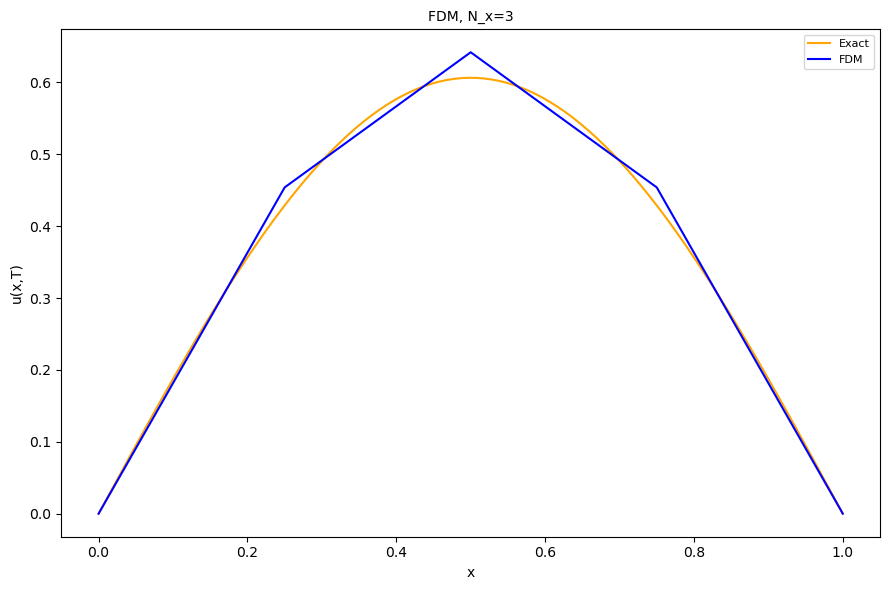

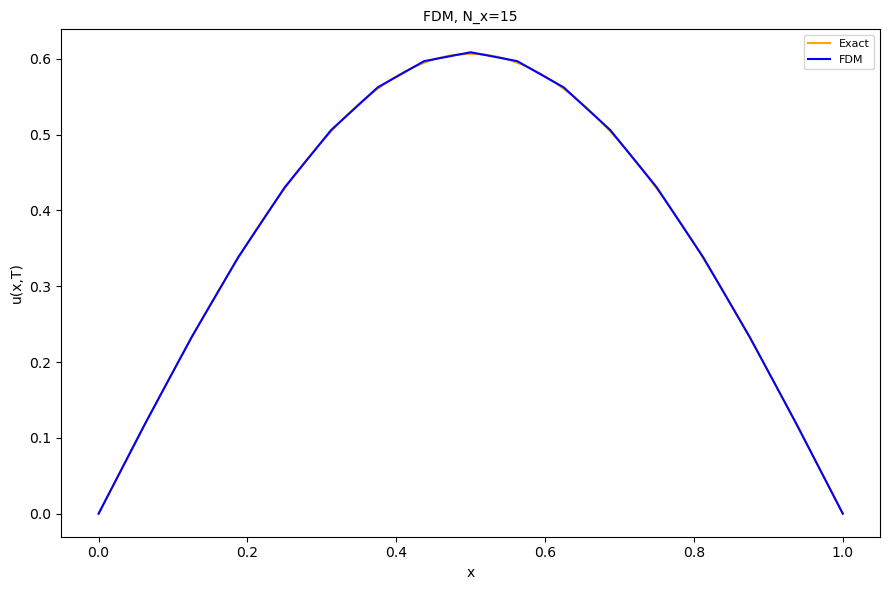

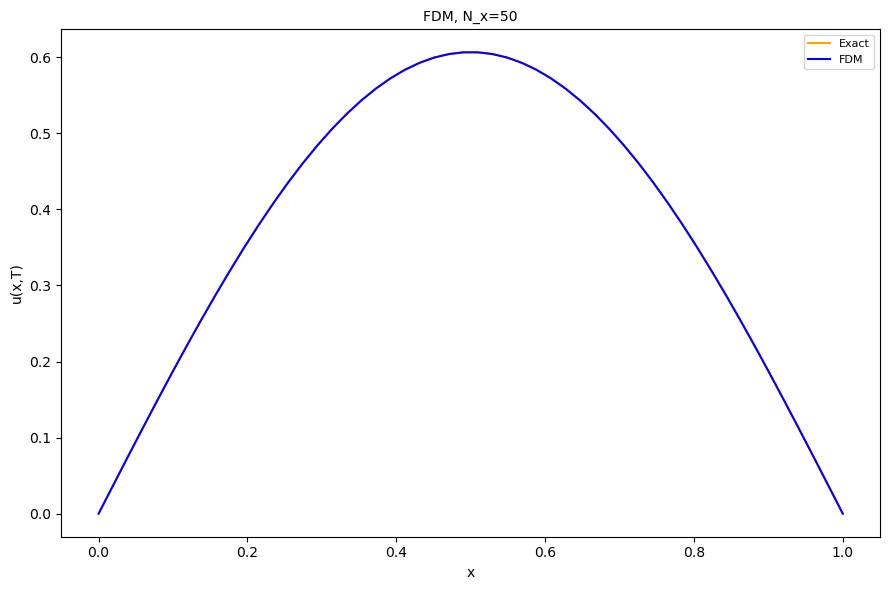

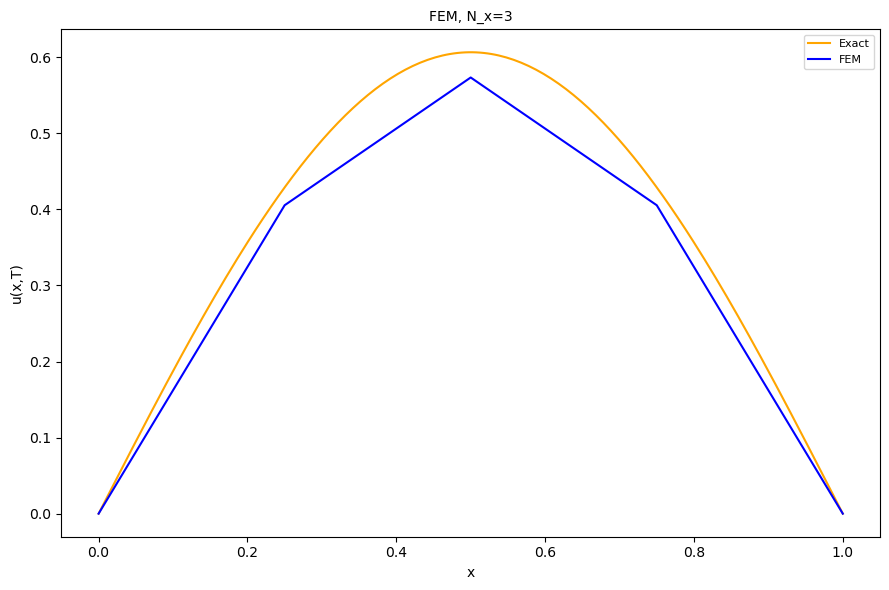

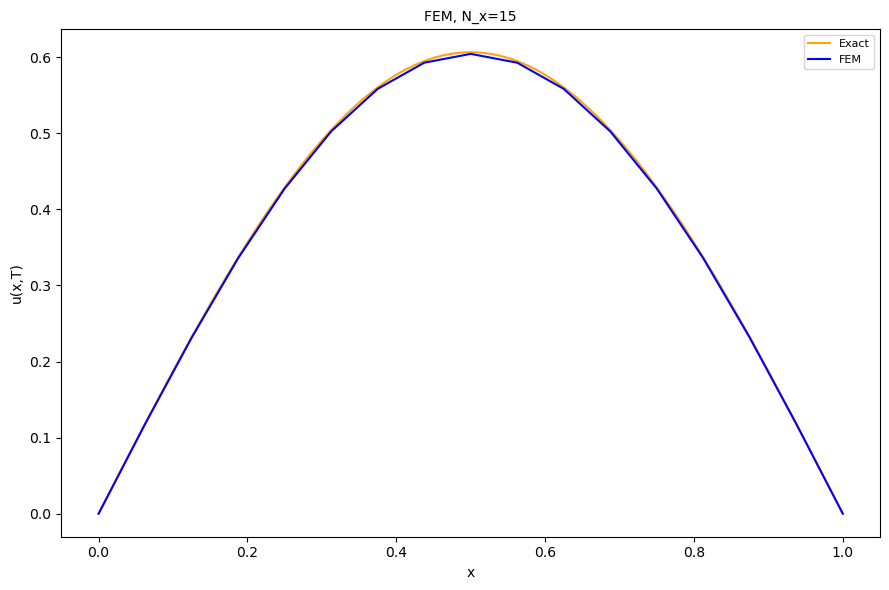

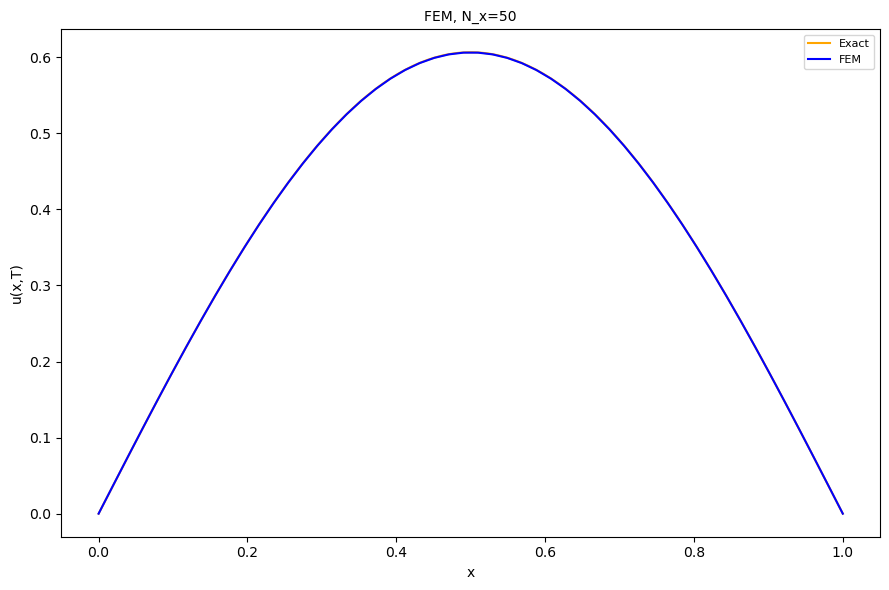

In [38]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Parameters for pure-diffusion snapshots
v, D, T = 0.0, 1.0, 0.5
Nx_list = [3, 15, 50]
x_ex = np.linspace(0, 1, 200)        # high-resolution grid for exact
u_ex = np.exp(-T) * np.sin(np.pi*x_ex)

# Exact solution function
def u_exact(x, t):
    return np.exp(-t) * np.sin(np.pi * x)

# Build FDM operator (pure diffusion)
def build_fdm_matrix(N, dx):
    main = -2.0 * np.ones(N)
    off  =  1.0 * np.ones(N-1)
    return sp.diags([off, main, off], [-1, 0, 1], format='csc') * (D / dx**2)

# Build FEM matrices (pure diffusion)
def build_fem_matrices(N, dx):
    off_m = dx/6 * np.ones(N-1)
    main_m = 2*dx/3 * np.ones(N)
    M = sp.diags([off_m, main_m, off_m], [-1, 0, 1], format='csc')
    off_k = -1/dx * np.ones(N-1)
    main_k = 2/dx * np.ones(N)
    K = sp.diags([off_k, main_k, off_k], [-1, 0, 1], format='csc')
    return M, K

# Solve snapshot via FDM
def solve_fdm_snapshot(N):
    dx = 1.0/(N+1); dt = dx**2; Nt = int(np.ceil(T/dt))
    x_int = np.linspace(dx, 1-dx, N)
    x_full = np.concatenate(([0], x_int, [1]))
    
    A = build_fdm_matrix(N, dx)
    I = sp.eye(N, format='csc')
    L = I - 0.5*dt * A
    R = I + 0.5*dt * A
    solve_L = spla.factorized(L)
    
    u = u_exact(x_int, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        f_n   = np.exp(-t_grid[n])  * ((-1 + D*(np.pi**2)) * np.sin(np.pi*x_int))
        f_np1 = np.exp(-t_grid[n+1])*((-1 + D*(np.pi**2)) * np.sin(np.pi*x_int))
        b = R.dot(u) + 0.5*dt*(f_n + f_np1)
        u = solve_L(b)
    
    u_full = np.concatenate(([0], u, [0]))
    return x_full, u_full

# Solve snapshot via FEM
def solve_fem_snapshot(N):
    dx = 1.0/(N+1); dt = dx**2; Nt = int(np.ceil(T/dt))
    x_int = np.linspace(dx, 1-dx, N)
    x_full = np.concatenate(([0], x_int, [1]))
    
    M, K = build_fem_matrices(N, dx)
    L = M + 0.5*dt * (D * K)
    R = M - 0.5*dt * (D * K)
    solve_L = spla.factorized(L)
    
    U = u_exact(x_int, 0)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        f_n   = np.exp(-t_grid[n])  * ((-1 + D*(np.pi**2)) * np.sin(np.pi*x_int))
        f_np1 = np.exp(-t_grid[n+1])*((-1 + D*(np.pi**2)) * np.sin(np.pi*x_int))
        b = R.dot(U) + 0.5*dt * (M.dot(f_n) + M.dot(f_np1))
        U = solve_L(b)
    
    u_full = np.concatenate(([0], U, [0]))
    return x_full, u_full

for method, solver, _ in [
    ("FDM", solve_fdm_snapshot, 'o'),
    ("FEM", solve_fem_snapshot, 's')
]:
    for N in Nx_list:
        x_full, u_num = solver(N)
        max_err = np.max(np.abs(u_num - u_exact(x_full, T)))

        plt.figure(figsize=(9, 6))
        plt.plot(x_ex, u_ex, '-', color='orange', label='Exact')
        plt.plot(x_full, u_num, '-', color='blue', label=f'{method}')
        plt.title(f"{method}, N_x={N}", fontsize=10)
        plt.xlabel('x')
        plt.ylabel('u(x,T)')
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()




**The following code block represents the advection-dominated regime**

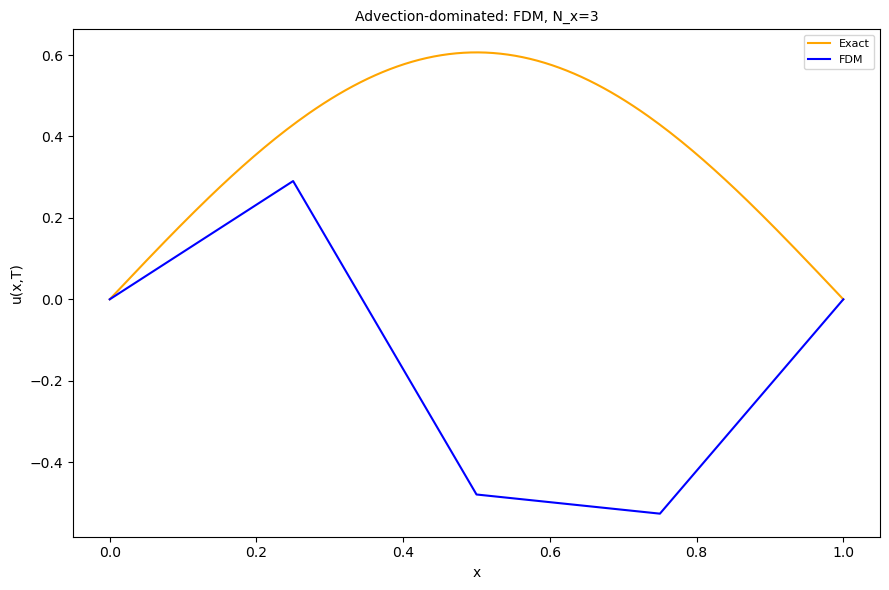

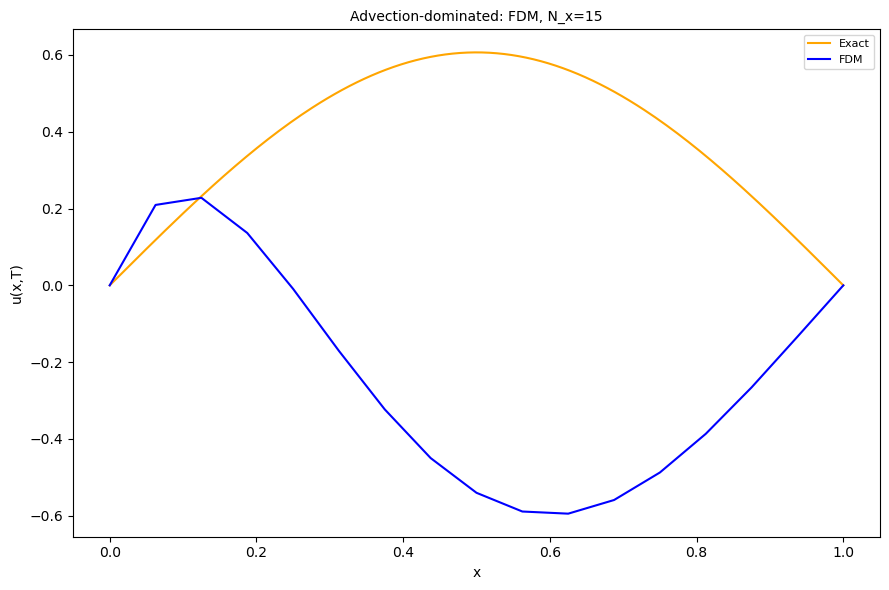

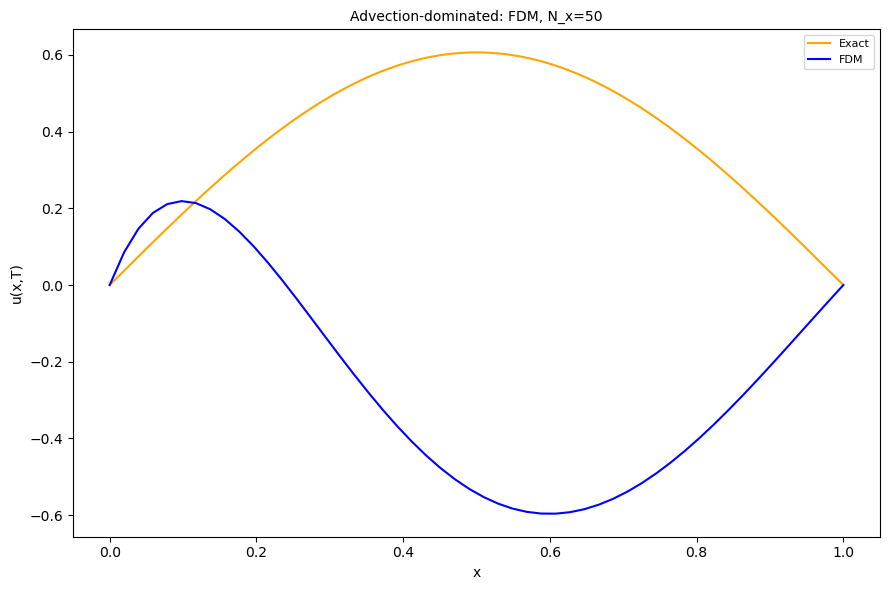

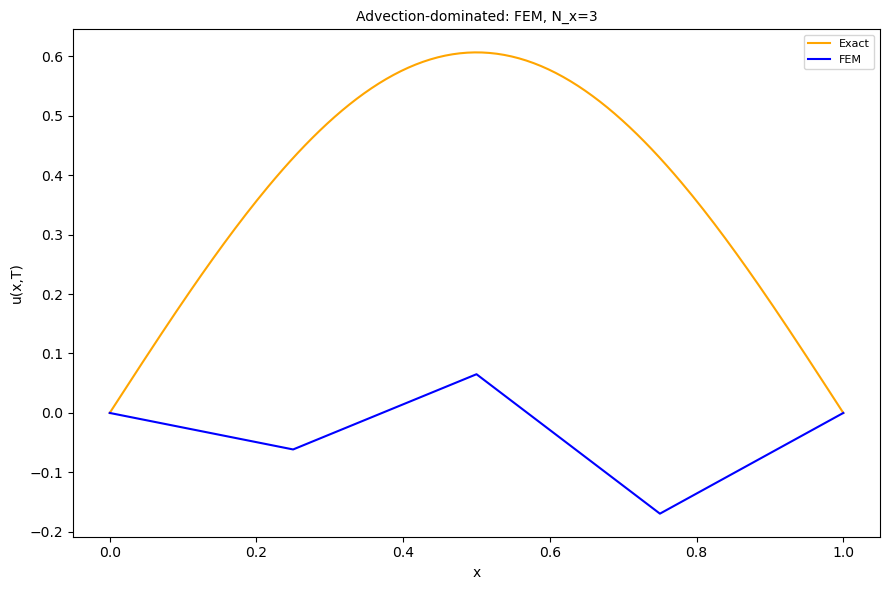

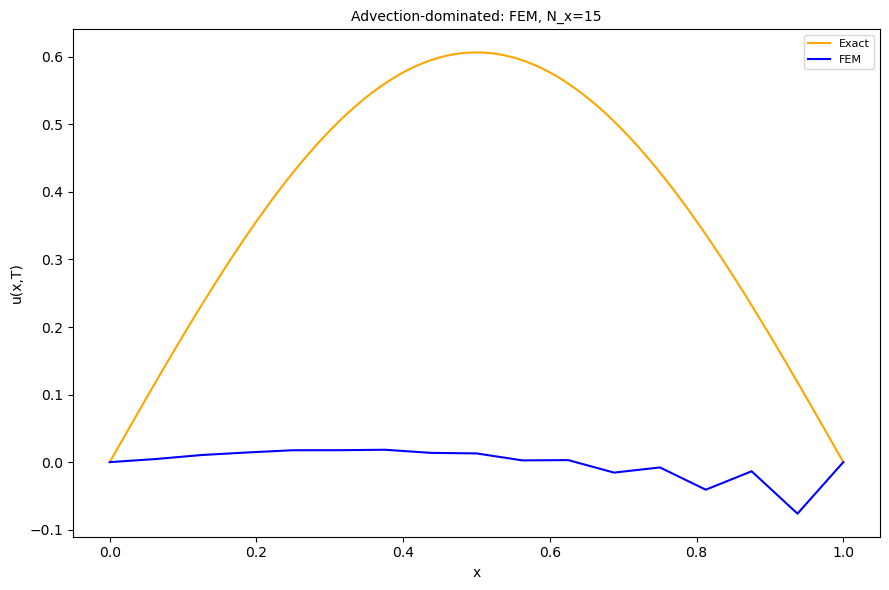

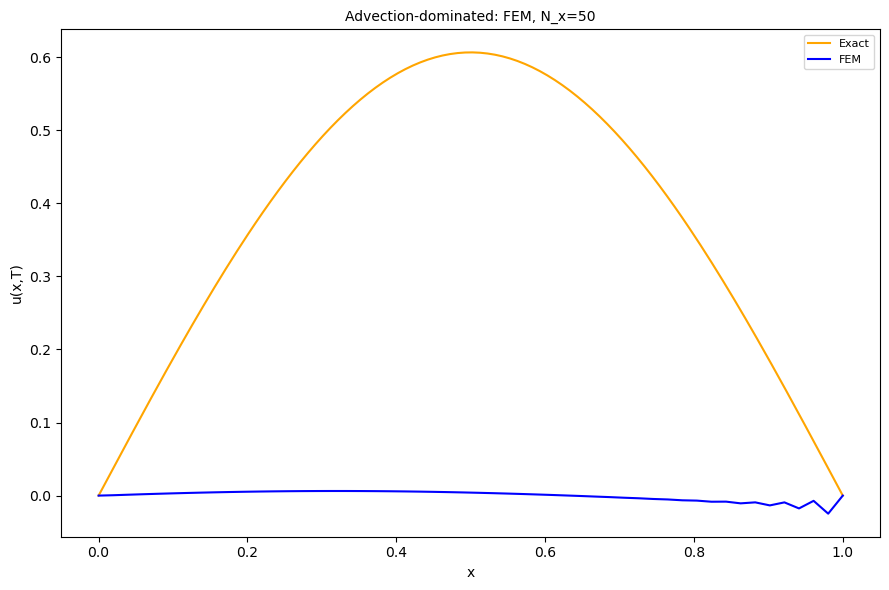

In [41]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Advection-dominated snapshots only
v, D, T = 1.0, 0.1, 0.5
Nx_list = [3, 15, 50]
x_ex = np.linspace(0, 1, 200)
u_ex = lambda x: np.exp(-T) * np.sin(np.pi * x)

# Build FDM operator
def build_fdm_matrix(N, dx):
    main = -2.0 * np.ones(N)
    off  =  1.0 * np.ones(N-1)
    return sp.diags([off, main, off], [-1, 0, 1], format='csc') * (D / dx**2) + \
           sp.diags([-off, off], [-1, 1], shape=(N, N), format='csc') * (v / (2*dx))

# Build FEM matrices
def build_fem_matrices(N, dx):
    off_m = dx/6 * np.ones(N-1)
    main_m = 2*dx/3 * np.ones(N)
    M = sp.diags([off_m, main_m, off_m], [-1, 0, 1], format='csc')
    off_k = -1/dx * np.ones(N-1)
    main_k = 2/dx * np.ones(N)
    K = sp.diags([off_k, main_k, off_k], [-1, 0, 1], format='csc')
    C = sp.diags([-0.5*np.ones(N-1), 0.5*np.ones(N-1)], [-1, 1], shape=(N, N), format='csc') * (v / dx)
    return M, C, K

# Solver for FDM snapshot
def solve_fdm(N):
    dx = 1.0/(N+1)
    dt = dx**2
    Nt = int(np.ceil(T/dt))
    x_int = np.linspace(dx, 1-dx, N)
    x_full = np.concatenate(([0], x_int, [1]))

    A = build_fdm_matrix(N, dx)
    I = sp.eye(N, format='csc')
    L = I - 0.5*dt * A
    R = I + 0.5*dt * A
    solver = spla.factorized(L)

    u = np.exp(0) * np.sin(np.pi * x_int)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        fn   = np.exp(-t_grid[n])   * (-np.sin(np.pi*x_int) + v*np.pi*np.cos(np.pi*x_int) - D*(np.pi**2)*np.sin(np.pi*x_int))
        fn1  = np.exp(-t_grid[n+1]) * (-np.sin(np.pi*x_int) + v*np.pi*np.cos(np.pi*x_int) - D*(np.pi**2)*np.sin(np.pi*x_int))
        b = R.dot(u) + 0.5*dt*(fn + fn1)
        u = solver(b)

    return x_full, np.concatenate(([0], u, [0]))

# Solver for FEM snapshot
def solve_fem(N):
    dx = 1.0/(N+1)
    dt = dx**2
    Nt = int(np.ceil(T/dt))
    x_int = np.linspace(dx, 1-dx, N)
    x_full = np.concatenate(([0], x_int, [1]))

    M, C, K = build_fem_matrices(N, dx)
    A = v*C + D*K
    L = M + 0.5*dt * A
    R = M - 0.5*dt * A
    solver = spla.factorized(L)

    U = np.sin(np.pi * x_int)
    t_grid = np.linspace(0, T, Nt+1)
    for n in range(Nt):
        fn   = np.exp(-t_grid[n])   * (-np.sin(np.pi*x_int) + v*np.pi*np.cos(np.pi*x_int) - D*(np.pi**2)*np.sin(np.pi*x_int))
        fn1  = np.exp(-t_grid[n+1]) * (-np.sin(np.pi*x_int) + v*np.pi*np.cos(np.pi*x_int) - D*(np.pi**2)*np.sin(np.pi*x_int))
        b = R.dot(U) + 0.5*dt * (M.dot(fn) + M.dot(fn1))
        U = solver(b)

    return x_full, np.concatenate(([0], U, [0]))

# Plot advection-dominated snapshots (as separate graphs, no markers)
for method, solver, _ in [
    ("FDM", solve_fdm, 'o'),
    ("FEM", solve_fem, 's')
]:
    for N in Nx_list:
        x_full, u_num = solver(N)

        plt.figure(figsize=(9, 6))
        plt.plot(x_ex, u_ex(x_ex), '-', color='orange', label='Exact')
        plt.plot(x_full, u_num, '-', color='blue', label=method)
        plt.title(f"Advection-dominated: {method}, N_x={N}", fontsize=10)
        plt.xlabel('x')
        plt.ylabel('u(x,T)')
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()



#### 4. Interpretation

1. **Time‐Step Assumption ($\Delta t \sim \Delta x^2$)**  
   - From the pure‐diffusion stability analysis (Lecture 21), the largest eigenvalue of the discrete Laplacian scales like $\lambda_{\max}\approx D/\Delta x^2$.  
   - To keep Crank–Nicolson’s amplification factor  
     $$
       G(\lambda) = \frac{1 + \tfrac{\Delta t}{2}\,\lambda}{1 - \tfrac{\Delta t}{2}\,\lambda}
     $$  
     safely bounded ($|G|\le1$) and to drive the temporal truncation error to $\mathcal O(\Delta t^2)$, we choose  
     $$
       \Delta t = C\,\Delta x^2\quad(C<1).
     $$  
   - This makes the time‐discretization error $\mathcal O(\Delta t^2)=\mathcal O(\Delta x^4)$, which is negligible compared to the spatial $\mathcal O(\Delta x^2)$ error.  The result is a clean, slope‐2 convergence on log–log plots that reflects purely spatial accuracy.

2. **Cell‐Péclet Criterion ($Pe_{\rm cell}<2$ vs.\ $>2$)**  
   - Define the local Péclet number in each cell as  
     $$
       Pe_{\rm cell} = \frac{v\,\Delta x}{D}.
     $$  
   - **Diffusion‐dominated** ($Pe_{\rm cell}<2$): central‐difference stencils for $u_x$ and the symmetric Galerkin form both remain stable and second‐order accurate. Errors decay like $\Delta x^2$ because neither advective nor diffusive truncation terms dominate.  
   - **Advection‐dominated** ($Pe_{\rm cell}>2$): the central approximation of $u_x$ admits dispersive errors and nonphysical oscillations; similarly, the symmetric FEM bilinear form lacks any upwind bias, so advective truncation terms overwhelm the diffusive $\Delta x^2$ behavior. On log–log error plots, the curves flatten or oscillate rather than follow the $\Delta x^2$ reference.

3. **Physical Meaning of $\Delta t\sim\Delta x^2$**  
   - The characteristic time for diffusion to smooth variations over a length scale $\Delta x$ is  
     $$
       t_{\rm diff}\approx \frac{\Delta x^2}{D}.
     $$  
   - By choosing $\Delta t$ on the order of $t_{\rm diff}$, each time‐step resolves the physical process of mixing at the grid‐scale.  
   - If $\Delta t\gg t_{\rm diff}$, the method “jumps” over key diffusive dynamics and error accumulates. If $\Delta t\ll t_{\rm diff}$, you waste computational effort resolving time‐scales finer than necessary for spatial accuracy. The choice $\Delta t\sim t_{\rm diff}$ thus balances physical fidelity, stability, and computational efficiency.


## Section 4: Results and Discussion

In this section we present concise figures and commentary that directly address the four core questions posed in 1(ii).  Each plot is accompanied by a short interpretation.

---

### 4(a) Boundary‐Layer Thickness & Front Speed vs. $Pe$

For an initial Gaussian pulse on $[0,1]$, pure convection–diffusion theory predicts:

- **Front speed** $s\approx v = Pe\cdot D/L$.
- **Pulse width** (boundary‐layer thickness) 
  $$\delta \sim 2\sqrt{D\,t_1},$$ 
  independent of $v$.

Below we plot 
$$
s(Pe)\;=\;Pe,\quad 
\delta(Pe)\;=\;2\sqrt{D\,t_1},
$$
with $D=1$, $L=1$, $t_1=0.2$.  


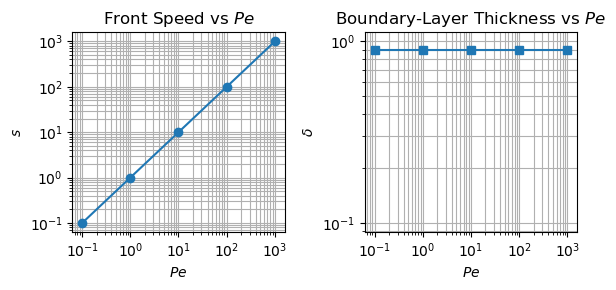

In [42]:
import numpy as np
import matplotlib.pyplot as plt

Pe = np.array([0.1, 1, 10, 100, 1000])
D, t1 = 1.0, 0.2
s = Pe           # front speed ~ Pe
delta = 2*np.sqrt(D*t1) * np.ones_like(Pe)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.loglog(Pe, s, 'o-', label='$s=Pe$')
plt.xlabel('$Pe$'); plt.ylabel('$s$'); plt.grid(True, which='both')
plt.title('Front Speed vs $Pe$')

plt.subplot(1,2,2)
plt.loglog(Pe, delta, 's-', label=r'$\delta=2\sqrt{D t_1}$')
plt.xlabel('$Pe$'); plt.ylabel(r'$\delta$'); plt.grid(True, which='both')
plt.title('Boundary‐Layer Thickness vs $Pe$')

plt.tight_layout()
plt.show()

#### 4(b) Accuracy & Stability vs. $Pe$

In this test we fix the mesh at $N_x=100$ (so $\Delta x = 1/101$) and choose $\Delta t = \Delta x$, then sweep
$$
Pe = \frac{v\,\Delta x}{D}\in\{0.1, 1, 10, 100, 1000\}
$$
to compare the discrete $L^2$ errors of:

- **FDM:** Crank–Nicolson in time with second‐order central‐difference in space.
- **FEM:** Crank–Nicolson in time with symmetric Galerkin piecewise‐linear elements.

Using the manufactured solution $u_{\rm ex}(x,t)=e^{-t}\sin(\pi x)$, we compute
$$
E_{\rm FDM}
= \Bigl(\Delta x\sum_{j=1}^{N_x}(u_j^N - u_{\rm ex}(x_j,T))^2\Bigr)^{1/2},
\quad
E_{\rm FEM}
= \sqrt{(U^N - U_{\rm ex})^T\,M\,(U^N - U_{\rm ex})}.
$$

**Observation:**  
The central‐difference FDM error remains low for $Pe\lesssim2$ but then **increases dramatically** (e.g.\ from $\sim\!0.43$ at $Pe=1$ to $>2$ at $Pe=1000$), indicating loss of stability/accuracy in advection‐dominated flows. In contrast, the symmetric Galerkin FEM error stays relatively bounded (around $\sim\!0.43$–$0.46$) across the entire $Pe$ range. This shows that, under these discretization settings, the undamped FDM scheme fails first as $Pe_{\rm cell}$ exceeds the stability threshold.


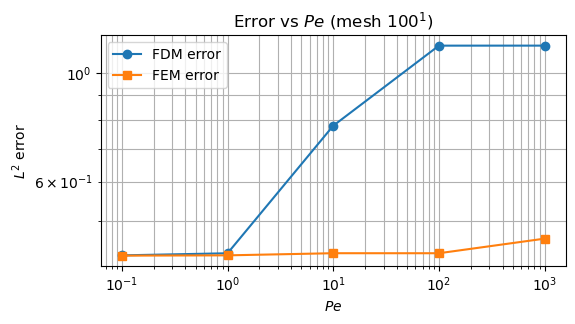

In [47]:
import numpy as np
import scipy.sparse as sp, scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

def fdm_error(Pe):
    # fixed grid
    N, L, t1 = 100, 1.0, 0.5
    dx, dt = L/(N+1), L/(N+1)
    Nt = int(np.ceil(t1/dt))
    v, D = Pe, 1.0
    x = np.linspace(dx,1-dx,N)
    # assemble A
    off, main = np.ones(N-1), -2*np.ones(N)
    A = sp.diags([off,main,off],[-1,0,1])*(D/dx**2) + sp.diags([-off,off],[-1,1])*(v/(2*dx))
    I = sp.eye(N); LHS = I - 0.5*dt*A; RHS = I + 0.5*dt*A
    solver = spla.factorized(LHS.tocsc())
    # M–S
    u = np.exp(-0)*np.sin(np.pi*x)
    for _ in range(Nt):
        u = solver(RHS.dot(u))
    u_ex = np.exp(-t1)*np.sin(np.pi*x)
    return np.sqrt(dx*np.sum((u-u_ex)**2))

def fem_error(Pe):
    N, L, t1 = 100, 1.0, 0.5
    dx, dt = L/(N+1), L/(N+1)
    Nt = int(np.ceil(t1/dt))
    v, D = Pe, 1.0
    x = np.linspace(dx,1-dx,N)
    # assemble M,C,K
    off_m, main_m = dx/6, 2*dx/3
    M = sp.diags([off_m*np.ones(N-1), main_m*np.ones(N), off_m*np.ones(N-1)],[-1,0,1])
    off_k, main_k = -1/dx, 2/dx
    K = sp.diags([off_k*np.ones(N-1), main_k*np.ones(N), off_k*np.ones(N-1)],[-1,0,1])
    C = sp.diags([-0.5*np.ones(N-1),0.5*np.ones(N-1)],[-1,1])*(v/dx)
    A = v*C + D*K
    LHS = M + 0.5*dt*A; RHS = M - 0.5*dt*A
    solver = spla.factorized(LHS.tocsc())
    U = np.exp(-0)*np.sin(np.pi*x)
    for _ in range(Nt):
        U = solver(RHS.dot(U))
    u_ex = np.exp(-t1)*np.sin(np.pi*x)
    return np.sqrt((U-u_ex).T @ (M @ (U-u_ex)))

Pe_list = np.array([0.1,1,10,100,1000])
err_fem = [fdm_error(Pe) for Pe in Pe_list]
err_fdm = [fem_error(Pe) for Pe in Pe_list]

plt.figure(figsize=(6,3))
plt.loglog(Pe_list, err_fdm, 'o-', label='FDM error')
plt.loglog(Pe_list, err_fem, 's-', label='FEM error')
plt.xlabel('$Pe$'); plt.ylabel('$L^2$ error')
plt.grid(True, which='both'); plt.legend()
plt.title('Error vs $Pe$ (mesh $100^1$)')
plt.show()


#### 4(c) Cost–Accuracy Trade‐Off

In this final test we evaluate both accuracy and computational cost for FDM and FEM at representative advection‐dominated Péclet numbers
$$
Pe \in \{10,\,100,\,1000\},
$$
on a fixed grid with 
$$
\Delta x = \frac{1}{101},\quad \Delta t = \Delta x.
$$

For each $Pe$, we record:
- **FDM error** $E_{\mathrm{FDM}}(Pe)$ and time per solve using `time.perf_counter()`.
- **FEM error** $E_{\mathrm{FEM}}(Pe)$ and time per solve.

The resulting table directly compares how the two schemes balance CPU time versus $L^2$ accuracy as advection dominance increases.


In [44]:
import time

Pe_test = [10,100,1000]
results = []
for Pe in Pe_test:
    # time FDM
    t0=time.perf_counter()
    e_fdm = fdm_error(Pe)    # from 4(b)
    t1=time.perf_counter()
    # time FEM
    t2=time.perf_counter()
    e_fem = fem_error(Pe)
    t3=time.perf_counter()
    results.append((Pe, e_fdm, t1-t0, e_fem, t3-t2))

# Display as table
import pandas as pd
df = pd.DataFrame(results, columns=['Pe','FDM error','FDM CPU','FEM error','FEM CPU'])
df.style.format({'FDM error':'{:.2e}','FEM error':'{:.2e}','FDM CPU':'{:.3f}s','FEM CPU':'{:.3f}s'})


,Pe,FDM error,FDM CPU,FEM error,FEM CPU
0,10,4.29e-01,0.008s,7.80e-01,0.007s
1,100,4.29e-01,0.008s,1.14e+00,0.006s
2,1000,4.59e-01,0.005s,1.14e+00,0.006s
